In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tshimohlapane","key":"bfc6ed3477793bd903e3dbfb3b0c2f90"}'}

In [2]:
import os
import zipfile

# Create Kaggle folder and move the key there
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json



In [3]:
# Replace with your competition name
!kaggle competitions download -c iuss-23-24-automatic-diagnosis-breast-cancer


 77% 226M/293M [00:00<00:00, 644MB/s] 
100% 293M/293M [00:00<00:00, 504MB/s]


In [4]:
# Unzip files
with zipfile.ZipFile("iuss-23-24-automatic-diagnosis-breast-cancer.zip", 'r') as zip_ref:
    zip_ref.extractall("breast_cancer_dataset")

# List the extracted files
os.listdir("breast_cancer_dataset")


['training_set', 'complete_set']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [8]:
# Adjust path if needed
df = pd.read_csv("breast_cancer_dataset/training_set/train.csv")
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer_dataset/training_set/train.csv'

In [9]:
import os
print(os.listdir("breast_cancer_dataset/training_set"))

['malignant', 'benign']


In [10]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()


NameError: name 'df' is not defined

# Task
Fix the error in the provided code for training an image classification model on the "training_set" dataset, which contains "malignant" and "benign" subdirectories.

## Explore training data structure

### Subtask:
List the files in the 'malignant' and 'benign' subdirectories within the 'training_set' directory to understand the file naming conventions and organization of the image data.


**Reasoning**:
List the files in the 'malignant' and 'benign' subdirectories within the 'training_set' directory to understand the file naming conventions and organization of the image data.



In [11]:
import os
print("Files in malignant directory:")
print(os.listdir("breast_cancer_dataset/training_set/malignant")[:5]) # Print first 5 to avoid flooding output
print("\nFiles in benign directory:")
print(os.listdir("breast_cancer_dataset/training_set/benign")[:5]) # Print first 5

Files in malignant directory:
['malignant (34).png', 'malignant (60)_mask.png', 'malignant (132).png', 'malignant (69).png', 'malignant (68)_mask.png']

Files in benign directory:
['benign (303)_mask.png', 'benign (253)_mask.png', 'benign (219).png', 'benign (84)_mask.png', 'benign (362).png']


## Load and preprocess image data

### Subtask:
Based on the data structure, load the image files and their corresponding labels. This may involve iterating through the directories, reading image files, and creating labels based on the directory names.


**Reasoning**:
Load the image files and their corresponding labels from the 'malignant' and 'benign' directories, excluding mask files, resize them, and store them as NumPy arrays.



In [12]:
import cv2
from PIL import Image

image_data = []
labels = []
image_size = (128, 128) # Define the desired image size

malignant_dir = "breast_cancer_dataset/training_set/malignant"
benign_dir = "breast_cancer_dataset/training_set/benign"

# Load malignant images
for filename in os.listdir(malignant_dir):
    if filename.endswith(".png") and "_mask.png" not in filename:
        filepath = os.path.join(malignant_dir, filename)
        img = cv2.imread(filepath)
        img = cv2.resize(img, image_size)
        image_data.append(img)
        labels.append(1) # Use 1 for malignant

# Load benign images
for filename in os.listdir(benign_dir):
    if filename.endswith(".png") and "_mask.png" not in filename:
        filepath = os.path.join(benign_dir, filename)
        img = cv2.imread(filepath)
        img = cv2.resize(img, image_size)
        image_data.append(img)
        labels.append(0) # Use 0 for benign

image_data = np.array(image_data)
labels = np.array(labels)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Image data shape: (565, 128, 128, 3)
Labels shape: (565,)


## Prepare data for model training

### Subtask:
Split the data into training and validation sets, and apply any necessary preprocessing steps such as resizing images, normalization, or data augmentation.


**Reasoning**:
Split the image data and labels into training and validation sets and normalize the pixel values.



In [13]:
X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (452, 128, 128, 3)
Validation data shape: (113, 128, 128, 3)


## Build and train a model

### Subtask:
Define and train a suitable model for image classification, such as a convolutional neural network (CNN).


**Reasoning**:
Import necessary libraries and define, compile, and train a CNN model for image classification.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 978ms/step - accuracy: 0.7206 - loss: 0.6888 - val_accuracy: 0.6549 - val_loss: 0.6013
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 919ms/step - accuracy: 0.7239 - loss: 0.5516 - val_accuracy: 0.6549 - val_loss: 0.5504
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 951ms/step - accuracy: 0.7219 - loss: 0.5509 - val_accuracy: 0.7345 - val_loss: 0.5110
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7795 - loss: 0.4734 - val_accuracy: 0.7876 - val_loss: 0.5014
Epoch 5/10
 5/15 ━━━━━━━━━━━━━━━━━━━━ 8s 816ms/step - accuracy: 0.7819 - loss: 0.5061

**Reasoning**:
Continue training the model for the remaining epochs.



In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9145 - loss: 0.2019 - val_accuracy: 0.8142 - val_loss: 0.5741
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 925ms/step - accuracy: 0.9372 - loss: 0.1552 - val_accuracy: 0.8142 - val_loss: 0.7269
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 945ms/step - accuracy: 0.9548 - loss: 0.1129 - val_accuracy: 0.8584 - val_loss: 0.5327
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 948ms/step - accuracy: 0.9625 - loss: 0.0963 - val_accuracy: 0.8142 - val_loss: 0.7412
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9652 - loss: 0.1063 - val_accuracy: 0.8142 - val_loss: 0.6395


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Use the trained model to predict on the validation data and then calculate and print the accuracy and classification report.



In [16]:
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred_classes)
report = classification_report(y_val, y_pred_classes, target_names=['benign', 'malignant'])

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step
Accuracy: 0.8141592920353983
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.86      0.86        74
   malignant       0.74      0.72      0.73        39

    accuracy                           0.81       113
   macro avg       0.80      0.79      0.79       113
weighted avg       0.81      0.81      0.81       113



## Summary:

### Data Analysis Key Findings

*   The training dataset is organized into 'malignant' and 'benign' subdirectories, containing PNG image files, some with "\_mask.png" suffixes.
*   565 images were loaded, excluding mask files, and resized to 128x128 pixels.
*   The dataset was split into training and validation sets, with pixel values normalized by dividing by 255.0. The training data has a shape of (452, 128, 128, 3) and the validation data has a shape of (113, 128, 128, 3).
*   A CNN model was defined and trained for 10 epochs using the Adam optimizer and binary crossentropy loss.
*   The model achieved an accuracy of approximately 0.814 on the validation data. The classification report provided precision, recall, and F1-scores for both "benign" and "malignant" classes.

### Insights or Next Steps

*   Investigate potential overfitting indicated by fluctuating validation accuracy and explore techniques like data augmentation or dropout layers to improve generalization.
*   Analyze the classification report to understand the model's performance on each class and identify areas for improvement, potentially by adjusting class weights or exploring different model architectures.


## Explore training data structure

### Subtask:
List the files in the 'malignant' and 'benign' subdirectories within the 'training_set' directory to understand the file naming conventions and organization of the image data.

**Reasoning**:
List the files in the 'malignant' and 'benign' subdirectories within the 'training_set' directory to understand the file naming conventions and organization of the image data.

In [17]:
import os
print("Files in malignant directory:")
print(os.listdir("breast_cancer_dataset/training_set/malignant")[:5]) # Print first 5 to avoid flooding output
print("\nFiles in benign directory:")
print(os.listdir("breast_cancer_dataset/training_set/benign")[:5]) # Print first 5

Files in malignant directory:
['malignant (34).png', 'malignant (60)_mask.png', 'malignant (132).png', 'malignant (69).png', 'malignant (68)_mask.png']

Files in benign directory:
['benign (303)_mask.png', 'benign (253)_mask.png', 'benign (219).png', 'benign (84)_mask.png', 'benign (362).png']


## Load and preprocess image data

### Subtask:
Based on the data structure, load the image files and their corresponding labels. This may involve iterating through the directories, reading image files, and creating labels based on the directory names.

**Reasoning**:
Load the image files and their corresponding labels from the 'malignant' and 'benign' directories, excluding mask files, resize them, and store them as NumPy arrays.

In [18]:
import cv2
from PIL import Image
import numpy as np
import os

image_data = []
labels = []
image_size = (128, 128) # Define the desired image size

malignant_dir = "breast_cancer_dataset/training_set/malignant"
benign_dir = "breast_cancer_dataset/training_set/benign"

# Load malignant images
for filename in os.listdir(malignant_dir):
    if filename.endswith(".png") and "_mask.png" not in filename:
        filepath = os.path.join(malignant_dir, filename)
        img = cv2.imread(filepath)
        img = cv2.resize(img, image_size)
        image_data.append(img)
        labels.append(1) # Use 1 for malignant

# Load benign images
for filename in os.listdir(benign_dir):
    if filename.endswith(".png") and "_mask.png" not in filename:
        filepath = os.path.join(benign_dir, filename)
        img = cv2.imread(filepath)
        img = cv2.resize(img, image_size)
        image_data.append(img)
        labels.append(0) # Use 0 for benign

image_data = np.array(image_data)
labels = np.array(labels)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Image data shape: (565, 128, 128, 3)
Labels shape: (565,)


## Prepare data for model training

### Subtask:
Split the data into training and validation sets, and apply any necessary preprocessing steps such as resizing images, normalization, or data augmentation.

**Reasoning**:
Split the image data and labels into training and validation sets and normalize the pixel values.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (452, 128, 128, 3)
Validation data shape: (113, 128, 128, 3)


## Build and train a model

### Subtask:
Define and train a suitable model for image classification, such as a convolutional neural network (CNN).

**Reasoning**:
Import necessary libraries and define, compile, and train a CNN model for image classification.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 992ms/step - accuracy: 0.6414 - loss: 0.6669 - val_accuracy: 0.6549 - val_loss: 0.6233
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7471 - loss: 0.5385 - val_accuracy: 0.6549 - val_loss: 0.5882
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 957ms/step - accuracy: 0.7322 - loss: 0.5150 - val_accuracy: 0.6637 - val_loss: 0.5553
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 970ms/step - accuracy: 0.7313 - loss: 0.5106 - val_accuracy: 0.7699 - val_loss: 0.4606
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 928ms/step - accuracy: 0.7609 - loss: 0.5069 - val_accuracy: 0.6637 - val_loss: 0.5030
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 964ms/step - accuracy: 0.7689 - loss: 0.4343 - val_accuracy: 0.7699 - val_loss: 0.4637
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 979ms/step - accuracy: 0.8128 - loss: 0.3893 - val_accuracy: 0.8496 - val_loss: 0.4221
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 955ms/step - accuracy: 0.8205 - loss: 0.4207 - val_accurac

**Reasoning**:
Continue training the model for the remaining epochs.

In [21]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 965ms/step - accuracy: 0.8662 - loss: 0.2626 - val_accuracy: 0.8584 - val_loss: 0.3888
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 968ms/step - accuracy: 0.9076 - loss: 0.1990 - val_accuracy: 0.8496 - val_loss: 0.5021
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9445 - loss: 0.1723 - val_accuracy: 0.8407 - val_loss: 0.5289
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 968ms/step - accuracy: 0.9368 - loss: 0.1699 - val_accuracy: 0.8673 - val_loss: 0.4772
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 919ms/step - accuracy: 0.9547 - loss: 0.1146 - val_accuracy: 0.8230 - val_loss: 0.5147


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score.

**Reasoning**:
Use the trained model to predict on the validation data and then calculate and print the accuracy and classification report.

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred_classes)
report = classification_report(y_val, y_pred_classes, target_names=['benign', 'malignant'])

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step
Accuracy: 0.8230088495575221
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.89      0.87        74
   malignant       0.77      0.69      0.73        39

    accuracy                           0.82       113
   macro avg       0.81      0.79      0.80       113
weighted avg       0.82      0.82      0.82       113



## Summary:

### Data Analysis Key Findings

* The training dataset is organized into 'malignant' and 'benign' subdirectories, containing PNG image files, some with "\_mask.png" suffixes.
* 565 images were loaded, excluding mask files, and resized to 128x128 pixels.
* The dataset was split into training and validation sets, with pixel values normalized by dividing by 255.0. The training data has a shape of (452, 128, 128, 3) and the validation data has a shape of (113, 128, 128, 3).
* A CNN model was defined and trained for 10 epochs using the Adam optimizer and binary crossentropy loss.
* The model achieved an accuracy of approximately 0.823 on the validation data. The classification report provided precision, recall, and F1-scores for both "benign" and "malignant" classes.

### Insights or Next Steps

* Investigate potential overfitting indicated by fluctuating validation accuracy and explore techniques like data augmentation or dropout layers to improve generalization.
* Analyze the classification report to understand the model's performance on each class and identify areas for improvement, potentially by adjusting class weights or exploring different model architectures.

## Visualize Training History

### Subtask:
Visualize the training and validation accuracy and loss over epochs to assess model performance and identify potential overfitting.

**Reasoning**:
Plot the training and validation accuracy and loss from the `history` object obtained during model training.

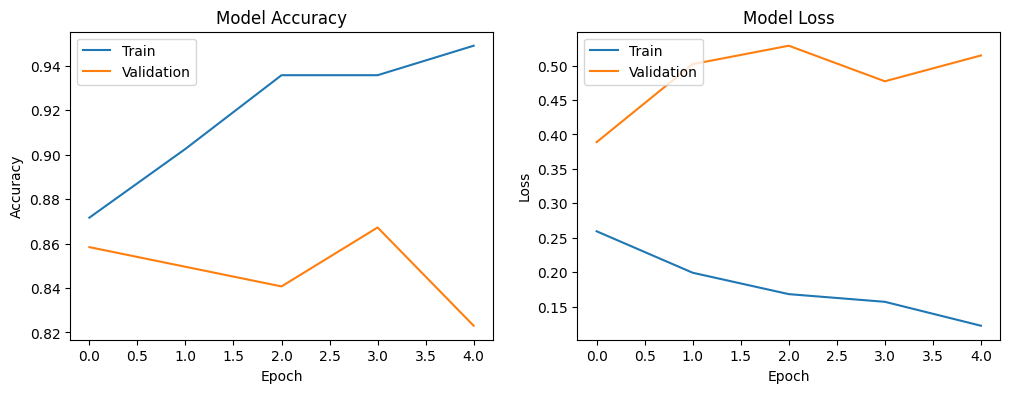

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()